# Color Processing
-----

## Objectives

\begin{itemize}
\item Use digital color histograms to segment regions of interest in an image.
\item Demonstrate how color changes under varying illumination.
\end{itemize}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
%matplotlib inline

In [ ]:
# macbeth = plt.imread("Gretag-Macbeth_ColorChecker.jpg")
# r, g, b = cv2.split(macbeth)
# fig = plt.figure()
# axis = fig.add_subplot(1, 1, 1, projection="3d")
# pixel_colors = macbeth.reshape((np.shape(macbeth)[0]*np.shape(macbeth)[1], 3))
# norm = colors.Normalize(vmin=-1.,vmax=1.)
# norm.autoscale(pixel_colors)
# pixel_colors = norm(pixel_colors).tolist()
# axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
# axis.set_xlabel("Red")
# axis.set_ylabel("Green")
# axis.set_zlabel("Blue")
# plt.show()

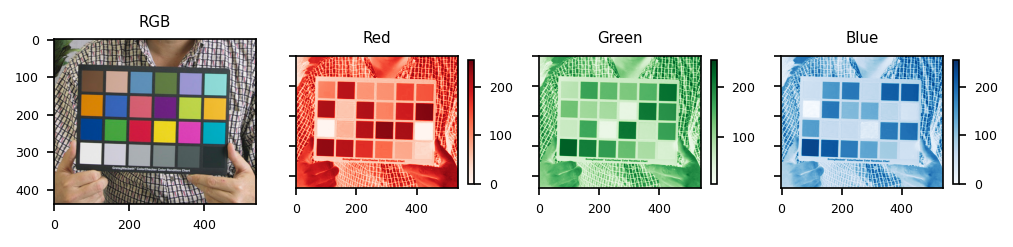

In [4]:
macbeth = plt.imread("Gretag-Macbeth_ColorChecker.jpg")

plt.rcParams.update({'font.size': 6})

fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, dpi = 150, figsize=(8,2))


axs[0].imshow(macbeth)
axs[0].set_title("RGB")

red = axs[1].imshow(macbeth[:,:,0], cmap = "Reds")
axs[1].set_title("Red")
plt.colorbar(red, ax = axs[1],  shrink=0.55)
green = axs[2].imshow(macbeth[:,:,1], cmap = "Greens")
axs[2].set_title("Green")
plt.colorbar(green, ax = axs[2], shrink=0.55)
blue = axs[3].imshow(macbeth[:,:,2], cmap = "Blues")
axs[3].set_title("Blue")
plt.colorbar(blue, ax = axs[3],shrink=0.55)
# plt.tight_layout()


## Thresholding

In [5]:
macbeth_ = cv2.imread("Gretag-Macbeth_ColorChecker.jpg")
r_coords = cv2.selectROI(macbeth_)
roi = macbeth_[int(r_coords[1]):int(r_coords[1]+r_coords[3]),
             int(r_coords[0]):int(r_coords[0]+r_coords[2])]
roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

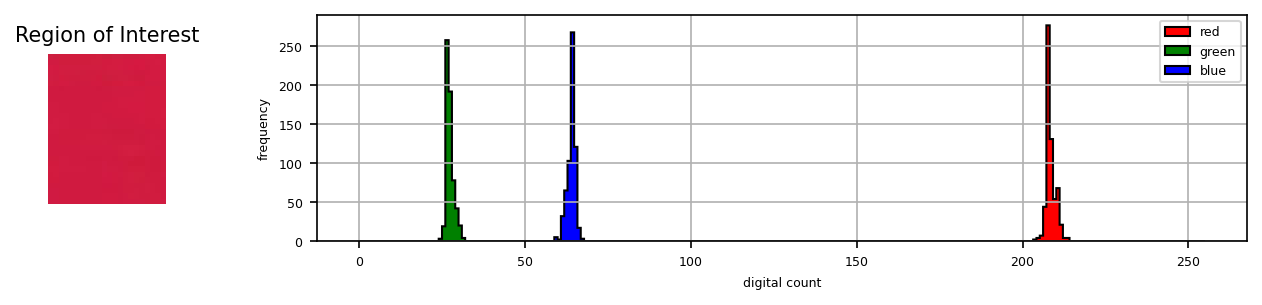

In [6]:
fig = plt.figure(figsize = (8,2), dpi = 150)
plt.hist(roi[:,:,0].flatten(), bins = 256, range = [0,255], histtype = "stepfilled", fc = 'r', ec = 'k', label = 'red')
plt.hist(roi[:,:,1].flatten(), bins = 256, range = [0,255], histtype = "stepfilled", fc = 'g', ec = 'k', label = 'green')
plt.hist(roi[:,:,2].flatten(), bins = 256, range = [0,255], histtype = "stepfilled", fc = 'b', ec = 'k', label = 'blue')
plt.grid()
plt.legend()
plt.xlabel("digital count")
plt.ylabel("frequency")

left, bottom, width, height = [-0.3,0.25, 0.5, 0.5]
ax01 = fig.add_axes([left, bottom, width, height])
ax01.imshow(roi)
ax01.set_axis_off()
ax01.set_title("Region of Interest", fontsize = 10)
plt.show()

Text(0.5, 1.0, 'Red+Green+Blue Threshold')

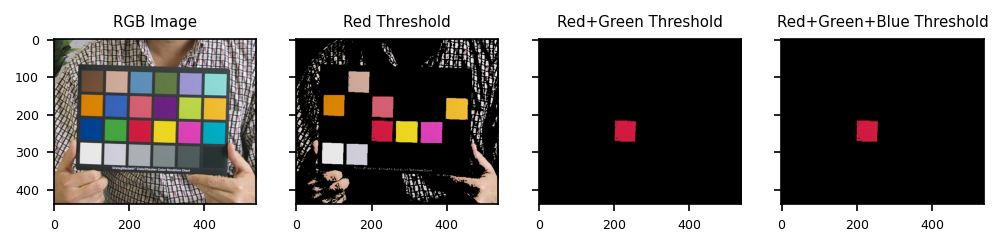

In [7]:
# macbeth = plt.imread("Gretag-Macbeth_ColorChecker.jpg")
image = macbeth

fig, ax = plt.subplots(1, 4, figsize = (8,2), sharey = True, dpi = 150)
plt.rcParams.update({'font.size': 6})
# plt.rcParams.update({'title.size': 7})

ax[0].imshow(image)
ax[0].set_title("RGB Image")
r_t_1, r_t_2, g_t_1, g_t_2, b_t_1, b_t_2 = 200, 250, 10, 40, 50, 80
image[image[:,:,0] < r_t_1] = 0
image[image[:,:,0] > r_t_2] = 0
ax[1].imshow(image)
ax[1].set_title("Red Threshold")
image[image[:,:,1] < g_t_1] = 0
image[image[:,:,1] > g_t_2] = 0
ax[2].imshow(image)
ax[2].set_title("Red+Green Threshold")
image[image[:,:,2] < b_t_1] = 0
image[image[:,:,2] > b_t_2] = 0
ax[3].imshow(image)
ax[3].set_title("Red+Green+Blue Threshold")

In [ ]:
# macbeth_ = cv2.imread("Gretag-Macbeth_ColorChecker.jpg")
# r_coords = cv2.selectROI(macbeth_)
# roi = macbeth_[int(r_coords[1]):int(r_coords[1]+r_coords[3]),
#              int(r_coords[0]):int(r_coords[0]+r_coords[2])]
# roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

# macbeth_ = cv2.cvtColor(macbeth_, cv2.COLOR_BGR2RGB)

# # plt.imshow(cv2.cvtColor(macbeth_, cv2.COLOR_BGR2RGB))
# # plt.imshow(roi)
# # plt.hist(roi[:,:,0].flatten(), bins = 256, range = [0,255])
# plt.imshow(RGB_Thresholding(macbeth_, ROI))

In [8]:
# def Thresh(image, roi):
#     thresh_freq = 0

#     n_r, bins_r = np.histogram(roi[:,:,0].flatten(), bins = 256, range = [0,255])
#     n_g, bins_r = np.histogram(roi[:,:,1].flatten(), bins = 256, range = [0,255])
#     n_b, bins_r = np.histogram(roi[:,:,2].flatten(), bins = 256, range = [0,255])

#     r_t_1, r_t_2 = np.where(n_r > thresh_freq)[0][0], np.where(n_r > thresh_freq)[0][-1]
#     g_t_1, g_t_2 = np.where(n_g > thresh_freq)[0][0], np.where(n_g > thresh_freq)[0][-1]
#     b_t_1, b_t_2 = np.where(n_b > thresh_freq)[0][0], np.where(n_b > thresh_freq)[0][-1]

#     plt.subplot(141)
#     image = cv2.cvtColor(macbeth_, cv2.COLOR_BGR2RGB)
#     plt.imshow(image)
#     image[image[:,:,0] < r_t_1] = 0
#     image[image[:,:,0] > r_t_2] = 0
#     plt.subplot(142)
#     plt.imshow(image)
#     image[image[:,:,1] < g_t_1] = 0
#     image[image[:,:,1] > g_t_2] = 0
#     plt.subplot(143)
#     plt.imshow(image)
#     image[image[:,:,2] < b_t_1] = 0
#     image[image[:,:,2] > b_t_2] = 0
#     plt.subplot(144)
#     plt.imshow(image)

In [11]:
# Thresh(macbeth_, roi)

In [10]:
# def RGB_Thresholding(image, ROI):

#     thresh_freq = 0
#     img = image
#     n_r, bins_r = np.histogram(ROI[:,:,0].flatten(), bins = 256, range = [0,255])
#     n_g, bins_r = np.histogram(ROI[:,:,1].flatten(), bins = 256, range = [0,255])
#     n_b, bins_r = np.histogram(ROI[:,:,2].flatten(), bins = 256, range = [0,255])

#     r_t_1, r_t_2 = np.where(n_r > thresh_freq)[0][0], np.where(n_r > thresh_freq)[0][-1]
#     g_t_1, g_t_2 = np.where(n_g > thresh_freq)[0][0], np.where(n_g > thresh_freq)[0][-1]
#     b_t_1, b_t_2 = np.where(n_b > thresh_freq)[0][0], np.where(n_b > thresh_freq)[0][-1]

#     img[img[:,:,0] < r_t_1] = 0
#     img[img[:,:,0] > r_t_2] = 0
#     img[img[:,:,1] < g_t_1] = 0
#     img[img[:,:,1] > g_t_2] = 0
#     img[img[:,:,2] < b_t_1] = 0
#     img[img[:,:,2] > b_t_2] = 0

#     return(img)

## Parametric Segmentation

In [16]:
macbeth = cv2.imread("Gretag-Macbeth_ColorChecker.jpg")
pattern = cv2.imread("pattern.jpg")
apple = cv2.imread("apple.jpg")
rainbow = cv2.imread("rainbow.jpg")
crack = cv2.imread("crack.jpg")
starry_night = cv2.imread("starry_night.jpg")

In [ ]:
# plt.rcParams.update({'font.size': 6})
# 

In [12]:
def Parametric_Segmentation(img, ROI):
    
    img = img/255
    ROI = ROI/255

    R = img[:,:,2]
    G = img[:,:,1]
    B = img[:,:,0]

    I = R+G+B

    I[I==0] = 10

    r = R/I
    g = G/I

    ROI_R = ROI[:,:,0]
    ROI_G = ROI[:,:,1]
    ROI_B = ROI[:,:,2]

    ROI_I = ROI_R+ROI_G+ROI_B
    ROI_r = ROI_R/ROI_I
    ROI_g = ROI_G/ROI_I

    mu_r, std_r = np.mean(ROI_r), np.std(ROI_r)
    mu_g, std_g = np.mean(ROI_g), np.std(ROI_g)

    P_r = (1/(std_r*np.sqrt(2*np.pi))) * (np.exp(-(r-mu_r)**2/(2*std_r**2)))
    P_g = (1/(std_r*np.sqrt(2*np.pi))) * (np.exp(-(g-mu_g)**2/(2*std_g**2)))
    
    return P_r*P_g

## Non-Parametric Segmentation

In [13]:
def Non_Parametric_Segmentation(img, ROI, BINS):
    img = img/255
    ROI = ROI/255

    R = img[:,:,2]
    G = img[:,:,1]
    B = img[:,:,0]

    I = R+G+B

    I[I==0] = 10

    r = R/I
    g = G/I

    ROI_R = ROI[:,:,0]
    ROI_G = ROI[:,:,1]
    ROI_B = ROI[:,:,2]

    ROI_I = ROI_R+ROI_G+ROI_B
    ROI_r = ROI_R/ROI_I
    ROI_g = ROI_G/ROI_I

    r_roi_int = (ROI_r*(BINS-1)).astype(int)
    g_roi_int = (ROI_g*(BINS-1)).astype(int)
    
    matrix, xbin, ybin = np.histogram2d(g_roi_int.flatten(), r_roi_int.flatten(), bins = BINS, range = [[0,BINS],[0,BINS]])
    r_int, g_int = (r*(BINS-1)).astype(int), (g*(BINS-1)).astype(int)
    
    back_projection = np.zeros(r.shape)
    for i in range(r.shape[0]):
        for j in range(r.shape[1]):
            back_projection[i,j] = matrix[g_int[i,j], r_int[i,j]]
    
    return back_projection


In [33]:
plt.rcParams.update({'font.size': 8})


In [34]:
def Segmentation(image, BINS):
    r_coords = cv2.selectROI(image)
    r_coords

    roi = image[int(r_coords[1]):int(r_coords[1]+r_coords[3]),
             int(r_coords[0]):int(r_coords[0]+r_coords[2])]
    ROI = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    
#     Thresh = RGB_Thresholding(image, ROI)
#     plt.imshow(Thresh)
    
    fig, ax = plt.subplots(1,3, figsize = (10,6), dpi = 100)
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original")
    rect = Rectangle((r_coords[0],r_coords[1]),
                     r_coords[2],r_coords[3],
                     linewidth=3,edgecolor='r',facecolor='none')
    ax[0].add_patch(rect)
    ax[0].annotate("ROI", (r_coords[0]+r_coords[2]/5, r_coords[1]+r_coords[3]/2))
    
    left, bottom, width, height = [-0.2, 0.4, 0.2, 0.2]
#     [-0.3,0.25, 0.5, 0.5]
    ax01 = fig.add_axes([left, bottom, width, height])
    ax01.imshow(ROI)
    ax01.set_title("ROI")
    ax01.set_axis_off()
    
#     Thresh = RGB_Thresholding(image, ROI)
#     ax[1].imshow(Thresh)
#     ax[1].set_title("Thresholding")
#     ax[1].set_axis_off()

    
    Par = Parametric_Segmentation(image, ROI)
    ax[1].imshow(Par, cmap = 'gray')
    ax[1].set_title("Parametric")
    ax[1].set_axis_off()

    NPar = Non_Parametric_Segmentation(image, ROI, BINS)
    ax[2].imshow(NPar, cmap = 'gray')
    ax[2].set_title("Non-parametric (bin size = " + str(BINS) + ")")
    ax[2].set_axis_off()
    
    plt.tight_layout()

C:\Users\renep\AppData\Local\Temp/ipykernel_15464/3195753905.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


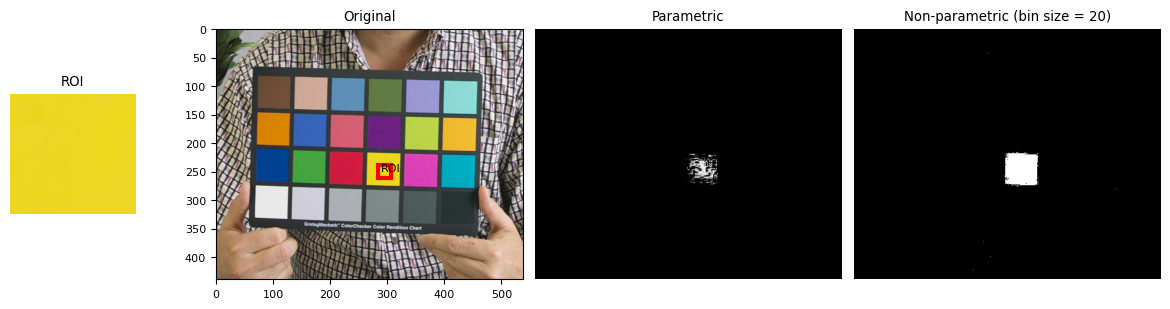

In [35]:
# macbeth = cv2.imread("Gretag-Macbeth_ColorChecker.jpg")
Segmentation(macbeth, 20)

C:\Users\renep\AppData\Local\Temp/ipykernel_15464/3195753905.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


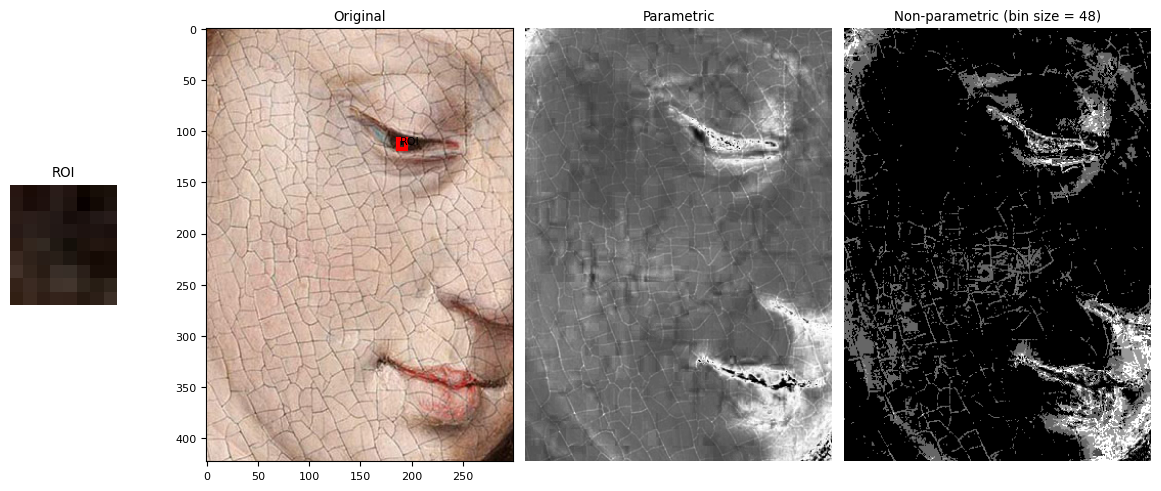

In [36]:
crack2 = cv2.imread("cracks-eg.jpg")
Segmentation(crack2, 48)

C:\Users\renep\AppData\Local\Temp/ipykernel_15464/3195753905.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


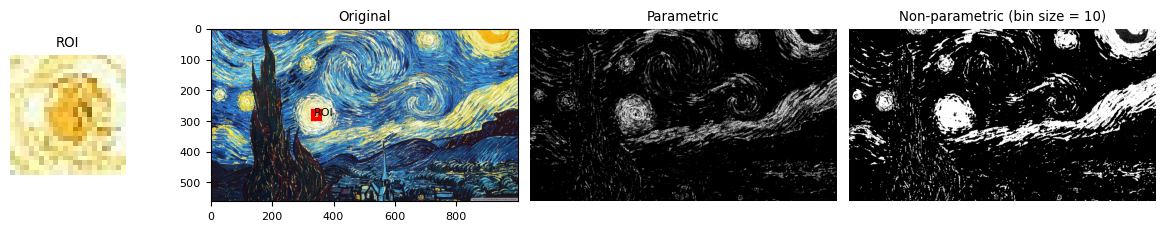

In [37]:
Segmentation(cv2.imread("starry_night.jpg"), 10)

C:\Users\renep\AppData\Local\Temp/ipykernel_15464/3195753905.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


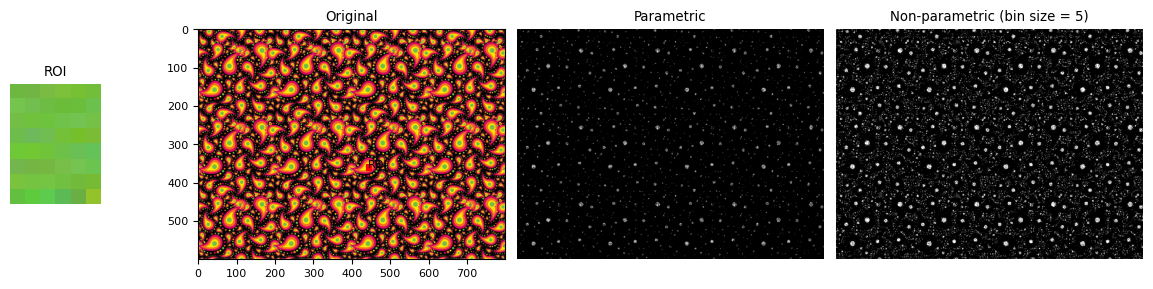

In [38]:
Segmentation(pattern, 5)

In [ ]:
Segmentation(pattern, 3)

In [ ]:
Segmentation(pattern, 7)

C:\Users\renep\AppData\Local\Temp/ipykernel_15464/3195753905.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


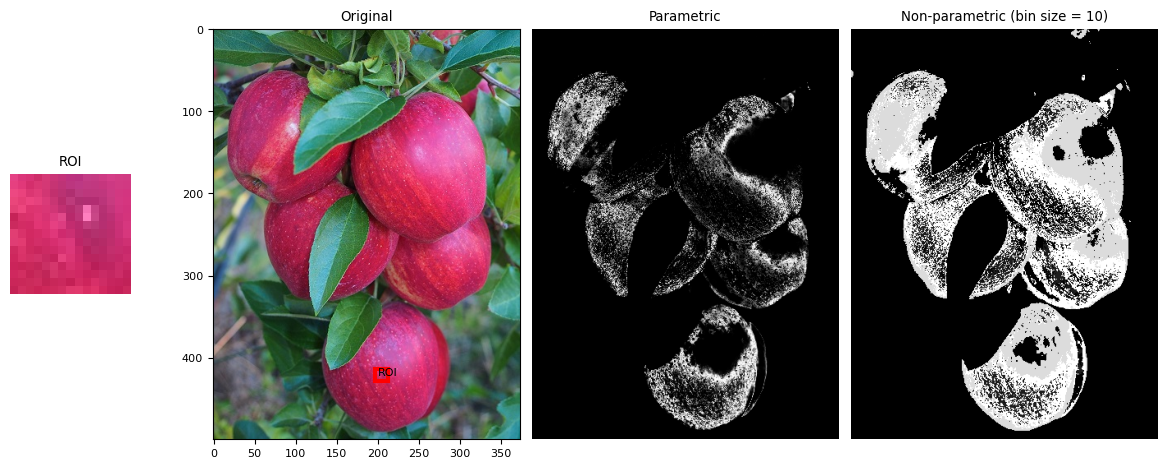

In [50]:
Segmentation(apple, 10)

C:\Users\renep\AppData\Local\Temp/ipykernel_15464/3195753905.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


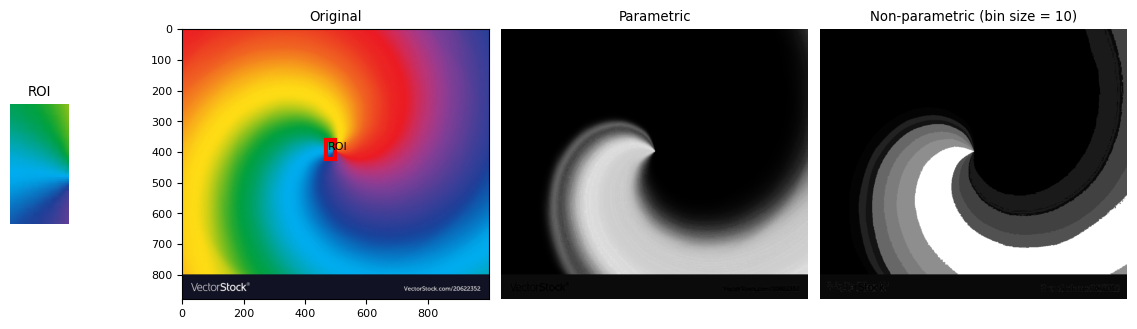

In [44]:
Segmentation(rainbow, 10)

In [ ]:
Segmentation(rainbow, 10)

In [ ]:
Segmentation(crack, 80)

C:\Users\renep\AppData\Local\Temp/ipykernel_15464/3195753905.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


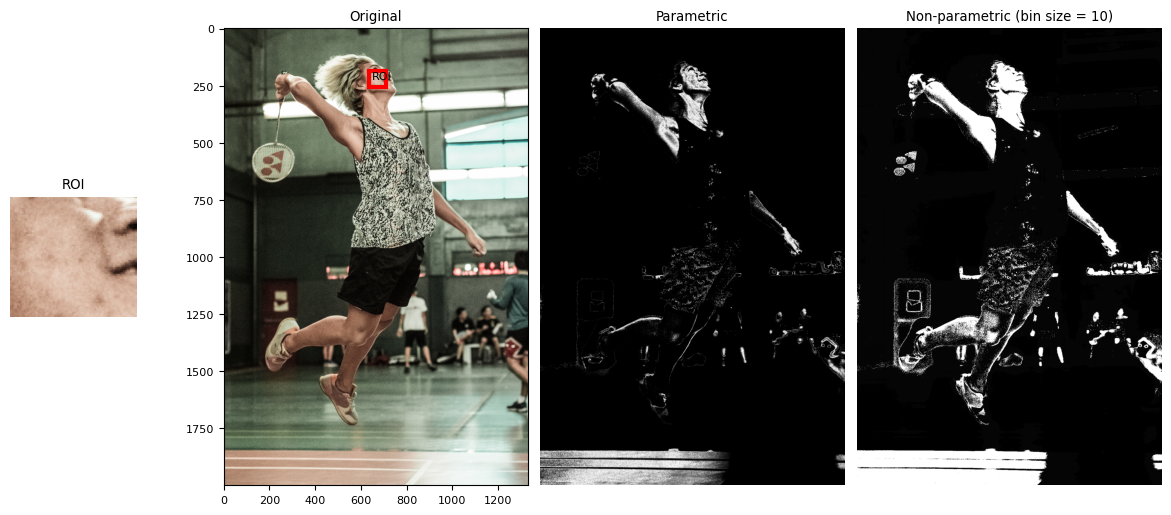

In [45]:
motion = cv2.imread("motion.jpg")
Segmentation(motion, 10)

C:\Users\renep\AppData\Local\Temp/ipykernel_15464/3195753905.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


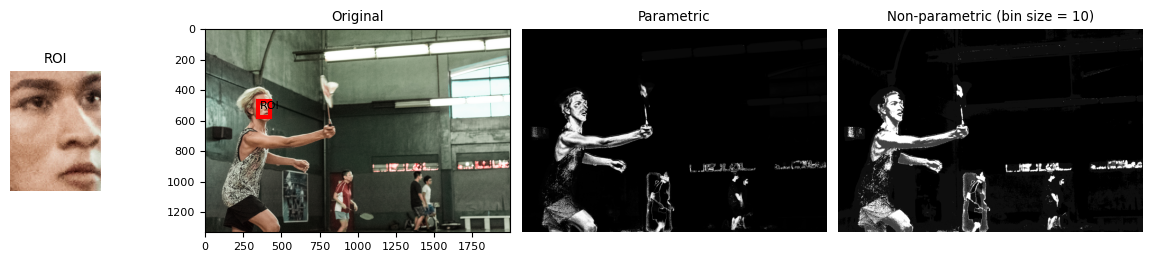

In [47]:
motion2 = cv2.imread("motion2.jpg")
Segmentation(motion2, 10)